In [1]:
# 라이브러리
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import torch
from transformers import CLIPTextModel, CLIPTokenizer, CLIPTextModelWithProjection
from diffusers import StableDiffusionPipeline
from diffusers import AutoPipelineForText2Image

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-14 21:18:11.684501: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-14 21:18:11.733404: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 21:18:11.733434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 21:18:11.734760: E external/l

In [2]:
# 학습된 clip 텍스트 모델 로드
text_model = CLIPTextModel.from_pretrained('kimdeoldeol/clip-vit-large_finetune')
text_model2 = CLIPTextModel.from_pretrained('kimdeoldeol/clip-vit-bigG_finetune')

text_model = text_model.to('cuda')
text_model2 = text_model2.to('cuda')

# 토크나이저
clip_tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
clip_tokenizer2 = CLIPTokenizer.from_pretrained("laion/CLIP-ViT-bigG-14-laion2B-39B-b160k")

/home/trevor/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
# stable-diffusuion 모델 불러오기 / pipeline / 허깅페이스 stabilityai/sdxl-turbo

sdxl_model = "stabilityai/sdxl-turbo"

pipe = AutoPipelineForText2Image.from_pretrained(sdxl_model, torch_dtype=torch.float16, variant="fp16")
pipe = pipe.to('cuda')

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]


In [4]:
# 텍스트 인코더 1 교체
pipe.text_encoder = text_model

In [5]:
pipe.tokenizer = clip_tokenizer

In [23]:
# 텍스트 인코더 2 교체
pipe.text_encoder2 = text_model2

In [24]:
pipe.tokenizer_2 = clip_tokenizer2

100%|██████████| 2/2 [00:00<00:00,  9.41it/s]


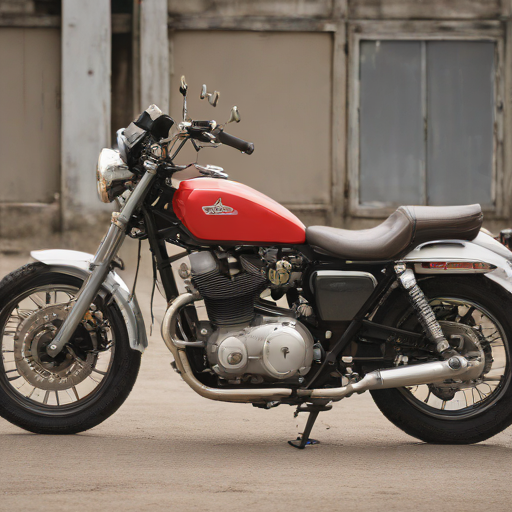

In [29]:
# 추론 | 이미지 생성
prompt = "빨간색 오토바이"
image = pipe(prompt=prompt, num_inference_steps=2, guidance_scale=0.9).images[0]
image